In [1]:
from PIL import Image
import numpy as np
import cv2
from PIL import Image
from pathlib import Path
import os
from map_generation.masks.building_mask import BuildingMaskCreator
from tqdm import tqdm
from map_generation.masks.mask_dataset import SegmentationDataset
from torch.utils.data.dataloader import DataLoader


VECTOR_PATH = Path("../data/vector_tiles")
RASTER_PATH = Path("../data/tiles")
MASK_PATH = Path("../data/tiles")
TILE_ID = "35873_21926"
ZOOM = 16

/home/marcin/Documents/mgr/projekt_n_w/own/.venv/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/marcin/Documents/mgr/projekt_n_w/own/map_generation/masks/building_mask.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEO

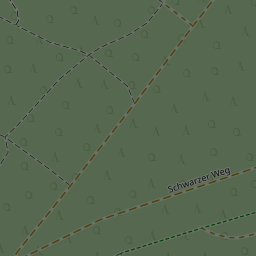

In [2]:
tile_id = "35170_21510"

mask_creator = BuildingMaskCreator(ZOOM, VECTOR_PATH / "Berlin, Germany", color=128)
mask = mask_creator.draw_mask(f"{tile_id}.mvt")
org_img = cv2.imread(f"../data/tiles/Berlin, Germany/{tile_id}.png")

mask_cv2 = cv2.cvtColor(np.array(mask), cv2.COLOR_GRAY2BGR)

img = cv2.addWeighted(mask_cv2, 0.5, org_img, 0.5, 0.0)

Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
vector_cities = set(os.listdir(VECTOR_PATH))

mask_creator = BuildingMaskCreator(zoom=ZOOM, path=VECTOR_PATH)
for city_dir in  os.listdir(RASTER_PATH):
    print(city_dir)
    if city_dir not in vector_cities:
        print("Skipping")
    else:
        rastser_path = RASTER_PATH / city_dir
        os.mkdir(rastser_path / "mask")
        for tile in tqdm(os.listdir(VECTOR_PATH / city_dir)):
            tile_path = os.path.join(city_dir, tile)
            mask_path = rastser_path / "mask" / tile.replace("mvt", "png")
            mask = mask_creator.draw_mask(tile_id=tile_path)
            mask.save(mask_path)
        break

Berlin, Germany


100%|██████████| 6786/6786 [03:38<00:00, 31.11it/s]


In [9]:
ds = SegmentationDataset(RASTER_PATH / "Berlin, Germany")
dl = DataLoader(ds, batch_size=32)
next(iter(dl))[0].shape

torch.Size([32, 3, 256, 256])